In [1]:
%%shell

cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF


apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg


cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

apt-get update
apt-get install chromium chromium-driver

pip install -q selenium

Executing: /tmp/apt-key-gpghome.sT4MOjSd6A/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.fEQk9QvHDD/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.UWW2dSJEk4/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 https://cloud.r-project.org/bin/l

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

In [3]:
# ブラウザをheadlessモード実行
options = webdriver.ChromeOptions()
#ヘッドレスモード（バックグラウンドで起動）で実行。コラボの場合、必須。
options.add_argument('--headless')
#サンドボックスモードの解除。これも必須。
options.add_argument('--no-sandbox')
#これも設定した方がよい。
options.add_argument('--disable-dev-shm-usage')

In [4]:
#インスタンス化
driver = webdriver.Chrome('chromedriver',options=options)
#指定したドライバーが見つかるまで待機
driver.implicitly_wait(10)

#urlの指定
url="https://app.tmhub.jp/sign_in"

driver.get(url)
time.sleep(2)

print("サイトのタイトル：", driver.title)

サイトのタイトル： TeamHub Admin


<html lang="en"><head><meta charset="utf-8"/><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-99313213-1"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=98a4bad271bf66a2594f3c7c28da23f4"></script><script async="" src="https://www.google-analytics.com/analytics.js"></script><script src="/cdn-cgi/apps/head/Kw8h-wKXW3osQrh3m_OD71MCGXo.js"></script><script src="/cdn-cgi/apps/body/yjd2RbfRlCw-Q8lF6qAR78T8v34.js"></script><link href="/favicon.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="#000000" name="theme-color"/><title>TeamHub Admin</title><meta content="「TeamHub」はあらゆるチームスポーツを楽しむ人達に送る、チームマネジメントツールです。「TeamHub」を使えば、連絡や出欠管理、スコアの共有まで「TeamHub」1つで行うことができます。" name="description"/><meta content="チームマネジメントツール,スポーツチームマネジメント,出欠管理,スポーツスコア,スポーツ,TeamHub,チームハブ,Link Spo
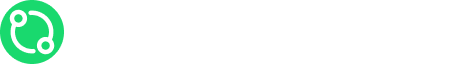
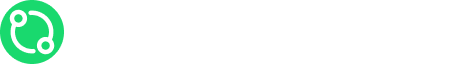
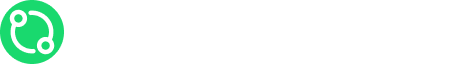
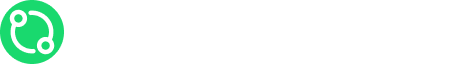

In [5]:
html = driver.page_source
BeautifulSoup(html,"lxml")

<html lang="en"><head><meta charset="utf-8"/><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-99313213-1"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/sdk.js?hash=98a4bad271bf66a2594f3c7c28da23f4"></script><script async="" src="https://www.google-analytics.com/analytics.js"></script><script src="/cdn-cgi/apps/head/Kw8h-wKXW3osQrh3m_OD71MCGXo.js"></script><script src="/cdn-cgi/apps/body/yjd2RbfRlCw-Q8lF6qAR78T8v34.js"></script><link href="/favicon.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="#000000" name="theme-color"/><title>TeamHub Admin</title><meta content="「TeamHub」はあらゆるチームスポーツを楽しむ人達に送る、チームマネジメントツールです。「TeamHub」を使えば、連絡や出欠管理、スコアの共有まで「TeamHub」1つで行うことができます。" name="description"/><meta content="チームマネジメントツール,スポーツチームマネジメント,出欠管理,スポーツスコア,スポーツ,TeamHub,チームハブ,Link Spo
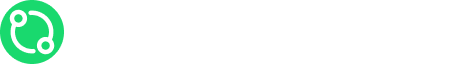
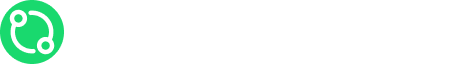

In [6]:
login = "kkytmkmmkcrucial@gmail.com"
password = "password"

# ユーザー名入力
driver.find_element(By.NAME,"email").send_keys(login)

# パスワード入力
driver.find_element(By.NAME,"password").send_keys(password)

#ログインボタンクリック
btn = driver.find_element(By.XPATH,'//*[@id="root"]/div/div/div/div/div/div[2]/div[2]/div/div[1]/form/div[3]/button')
btn.click()

time.sleep(2)
html = driver.page_source
BeautifulSoup(html,"lxml")

In [7]:
#ログイン後，メンバーページに遷移
url2="https://app.tmhub.jp/members"

driver.get(url2)
time.sleep(2)

print("サイトのタイトル：", driver.title)

サイトのタイトル： TeamHub Admin


In [8]:
#メンバー一覧を表示
html = driver.page_source
soup=BeautifulSoup(html,"lxml")
mem_list=soup.find_all(class_="MemberList_MemberListOpen__1ee9b")
print(mem_list)

[<div class="MemberList_MemberListOpen__1ee9b" id="1316492"><div><div class="Row_MemberListRow__23Dn5"><div class="row"><div class="column number"></div><div class="column name"><div class="Avatar_Avatar__2-HDY small avatar"><span class="Icon_Icon__3upEf icon-person medium icon"></span></div>matsuo</div><div class="column position"></div><div class="column role">Member</div><div class="column email"></div></div></div></div></div>, <div class="MemberList_MemberListOpen__1ee9b" id="1298292"><div><div class="Row_MemberListRow__23Dn5"><div class="row"><div class="column number"></div><div class="column name"><div class="Avatar_Avatar__2-HDY small avatar"><span class="Icon_Icon__3upEf icon-person medium icon"></span></div>みわ</div><div class="column position"></div><div class="column role">Administrator</div><div class="column email"></div></div></div></div></div>, <div class="MemberList_MemberListOpen__1ee9b" id="1300816"><div><div class="Row_MemberListRow__23Dn5"><div class="row"><div clas

In [12]:
import re
#login者
own='matsuo'
#メンバーidを上のdivから取得
target='id="[0-9]{7}'
idx=re.findall(target,str(mem_list))
avg_list=list()
avg_list.clear
for i in range(len(idx)):
  url3="https://app.tmhub.jp/members/"+str(idx[i][4:11])
  driver.get(url3)
  time.sleep(3)
  html = driver.page_source
  soup=BeautifulSoup(html,"lxml")
  name=soup.find_all(class_="MemberDetailView_MemberDetailBox__1TADG")
  name_sentou=str(name).find('<dl class="MemberDetailView_MemberDetailBox__1TADG"><dt>')
  name_ushiro=str(name).find('</dt><dd>Number:')
  #loginした人だけ，html表記が異なる？
  if own  in str(name):
    name_ushiro=str(name).find('<div class="MemberDetailView_EditButton')


  per_score=soup.find_all("li")
  target='AVG</span></div><div class="listValue">.*<.'
  per_score=re.findall(target,str(per_score))
  avg_sentou=str(per_score).find('AVG</span></div><div class="listValue">')
  avg_ushiro=str(per_score).find('</div></li>, <li class="listItem"><div class="listKey"><span class="listkey">RBI')
  #名前,id,打率のリスト
  print(name)
  avg_list.append([str(name)[name_sentou+56:name_ushiro],str(idx[i][4:11]),str(per_score)[avg_sentou+39:avg_ushiro]])
  print(avg_list)

print(avg_list)

[<dl class="MemberDetailView_MemberDetailBox__1TADG"><dt>matsuo<div class="MemberDetailView_EditButton__2C3EE"><button class="k-button k-button-md k-button-rectangle k-button-outline k-button-outline-base k-rounded-md Button_Shared__9S0Eh primary small button" type="button"><span class="k-button-text">Edit</span></button></div></dt><dd>Number: </dd><dd>Position: </dd><dd>Member's Type: Player</dd><dd>Biography: <div class="MemberDetailView_BioText__3jO6Z"></div></dd></dl>]
[['matsuo', '1316492', '.000']]
[<dl class="MemberDetailView_MemberDetailBox__1TADG"><dt>みわ</dt><dd>Number: </dd><dd>Position: </dd><dd>Member's Type: Player</dd><dd>Biography: <div class="MemberDetailView_BioText__3jO6Z"></div></dd></dl>]
[['matsuo', '1316492', '.000'], ['みわ', '1298292', '.000']]
[<dl class="MemberDetailView_MemberDetailBox__1TADG"><dt>助っ人</dt><dd>Number: 9999</dd><dd>Position: </dd><dd>Member's Type: Player</dd><dd>Biography: <div class="MemberDetailView_BioText__3jO6Z"></div></dd></dl>]
[['matsuo'

In [13]:
 avg_list.sort(reverse=True, key=lambda x:x[2])
 print(avg_list[0][0])




え


In [14]:
import csv

csv_path = "/content/drive/MyDrive/"

csv_name = 'personal_score.csv'
for i in range(len(avg_list)):
    del avg_list[i][1]
print(avg_list)
with open(csv_path+csv_name, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(avg_list)

[['え', '1.000'], ['う', '1.000'], ['い', '1.000'], ['浅見', '.500'], ['村上', '.500'], ['あ', '.500'], ['加藤', '.333'], ['金田', '.333'], ['沼田', '.250'], ['板垣', '.250'], ['matsuo', '.000'], ['みわ', '.000'], ['助っ人', '.000'], ['助っ人', '.000'], ['斎藤', '.000'], ['田崎', '.000'], ['西川', '.000'], ['け', '.000'], ['く', '.000'], ['き', '.000'], ['か', '.000'], ['お', '.000'], ['と', '.000'], ['て', '.000'], ['つ', '.000'], ['ち', '.000'], ['た', '.000'], ['そ', '.000'], ['せ', '.000'], ['す', '.000'], ['し', '.000'], ['さ', '.000'], ['こ', '.000']]
